In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import IsolationForest

In [7]:
# Step 1: Simulate Vibration Data
# Here, we are generating synthetic vibration data to mimic the behavior of a vibrating machine.
# The data will include a normal sine wave pattern representing regular vibrations, along with added random noise to simulate real-world variability.
# Generate a time array
# Using np.linspace to create 1000 evenly spaced time points between 0 and 10 seconds.
# These time points act as the x-axis for our vibration data, representing time in seconds.
# Generate normal vibration amplitudes as a sine wave with noise
time = np.linspace(0, 10, 1000)  # Time in seconds
# 2 * np.pi Converts the frequency from cycles per second (Hertz) into angular frequency (radians/second)
normal_vibration = np.sin(2 * np.pi * 10 * time) + np.random.normal(0, 0.2, len(time))  # Frequency = 10 Hz

In [8]:
# Add anomalies (spikes in vibration amplitude)
#At index 200 the value becomes 3
#At index 700 the value becomes -3
anomalies = [200, 700]  # Indices of anomalies
vibration_data = normal_vibration.copy()
vibration_data[anomalies] = [3, -3]  # Spikes


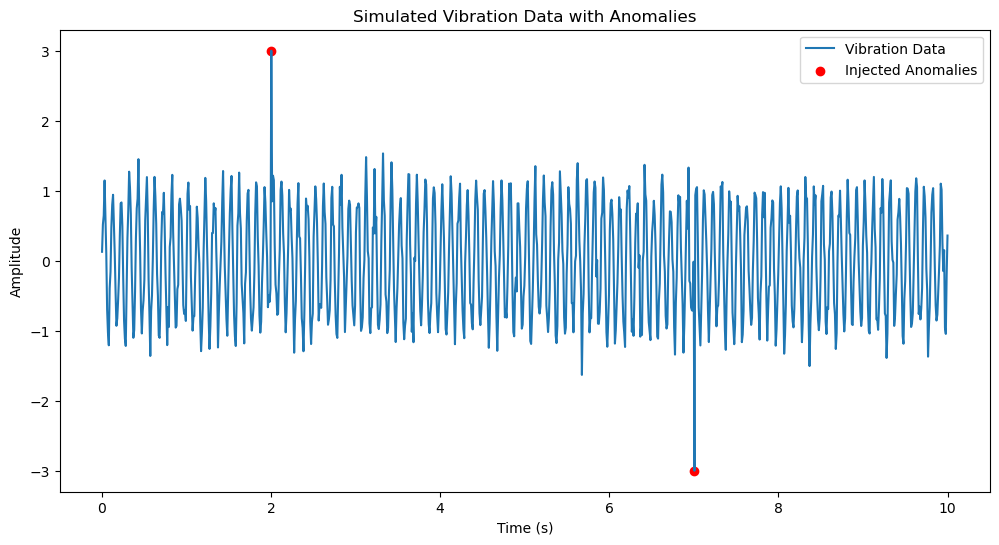

In [9]:
# Plot the vibration data
plt.figure(figsize=(12, 6))
plt.plot(time, vibration_data, label='Vibration Data')
plt.scatter(time[anomalies], vibration_data[anomalies], color='red', label='Injected Anomalies')
plt.title('Simulated Vibration Data with Anomalies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [10]:
# Step 2: Use Random Isolation Forest to Detect Outliers
# Prepare the data for RIF
vibration_data_reshaped = vibration_data.reshape(-1, 1)


In [11]:
# Initialize the IsolationForest model
# used to detect anomalies by isolating them through recursive random splits in the data.
# expect 1% of the data points to be anomalies
rif_model = IsolationForest(contamination=0.01, random_state=42)  # Expect ~1% anomalies
# learns what normal looks like by analyzing the vibration patterns in the data
rif_model.fit(vibration_data_reshaped)

IsolationForest(contamination=0.01, random_state=42)

In [12]:
# Predict anomalies  User vibration data to understand the anomolies.  decicion function higher score means normal.  Lower means anomaly further from dense region.  
predictions = rif_model.predict(vibration_data_reshaped)  # -1 = anomaly, 1 = normal
anomaly_scores = rif_model.decision_function(vibration_data_reshaped)

In [13]:
# Identify anomaly indices
detected_anomalies = np.where(predictions == -1)[0]

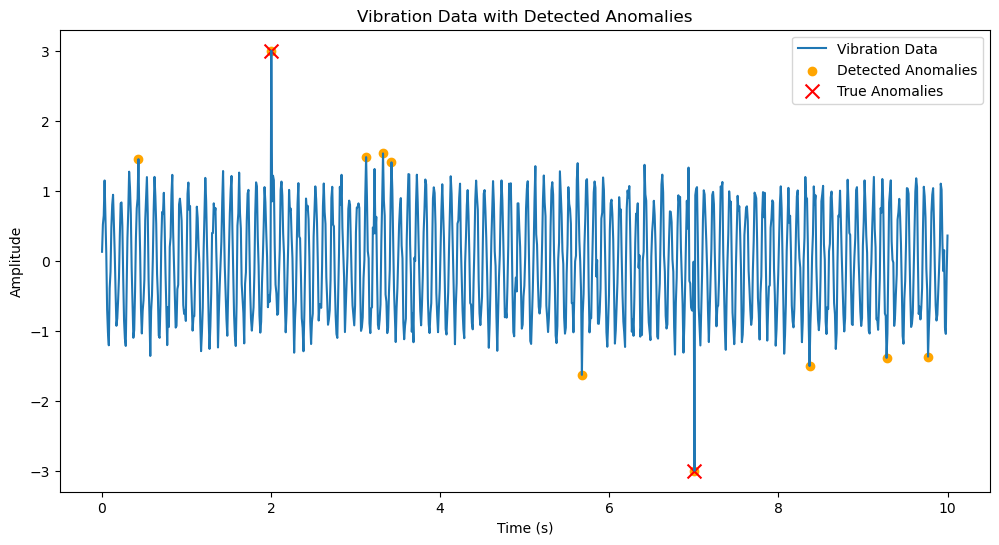

In [14]:
# Step 3: Visualize Detected Anomalies
plt.figure(figsize=(12, 6))
plt.plot(time, vibration_data, label='Vibration Data')
plt.scatter(time[detected_anomalies], vibration_data[detected_anomalies], color='orange', label='Detected Anomalies')
plt.scatter(time[anomalies], vibration_data[anomalies], color='red', label='True Anomalies', marker='x', s=100)
plt.title('Vibration Data with Detected Anomalies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [15]:
# Step 4: Print Results
print("Detected Anomalies:")
for idx in detected_anomalies:
    print(f"Time: {time[idx]:.2f}s, Amplitude: {vibration_data[idx]:.2f}")

Detected Anomalies:
Time: 0.43s, Amplitude: 1.45
Time: 2.00s, Amplitude: 3.00
Time: 3.12s, Amplitude: 1.48
Time: 3.32s, Amplitude: 1.53
Time: 3.42s, Amplitude: 1.41
Time: 5.68s, Amplitude: -1.63
Time: 7.01s, Amplitude: -3.00
Time: 8.37s, Amplitude: -1.50
Time: 9.28s, Amplitude: -1.39
Time: 9.77s, Amplitude: -1.37
